In [16]:
import pandas as pd
import numpy as np


df = pd.read_csv('../../data/processed/SalesRevenueProcessed.csv')
df.head()

,IsPromotionApplied,ProductionCost,MarketingSpend,SeasonalDemandIndex,CompetitorPrice,CustomerRating,EconomicIndex,StoreCount,ProductCategory_Electronics,ProductCategory_Furniture,ProductCategory_Toys,Region_North,Region_South,Region_West,CustomerSegment_Low Income,CustomerSegment_Middle Income,SalesRevenue
0,1.028403,0.369698,-0.235802,0.022636,-0.970258,0.88176,2.414633,0.114937,-0.596601,1.753089,-0.570422,-0.585819,-0.589668,-0.582739,-0.73622,-0.678911,2293.143707
1,-0.972381,-1.492378,1.085554,0.022636,2.059882,0.88176,0.223070,-0.472621,-0.596601,-0.570422,1.753089,-0.585819,-0.589668,1.716034,-0.73622,-0.678911,1640.454368
2,-0.972381,1.199536,1.526006,0.022636,0.784033,0.88176,-1.185792,-0.161561,1.676163,-0.570422,-0.570422,-0.585819,1.695868,-0.582739,-0.73622,-0.678911,2173.086023
3,1.028403,-1.623937,-0.956541,0.022636,-1.105204,0.88176,1.475392,-1.163866,-0.596601,1.753089,-0.570422,-0.585819,-0.589668,1.716034,-0.73622,1.472947,1672.608857
4,1.028403,-0.227381,-0.916500,1.763858,-0.307798,0.88176,0.588330,0.425997,-0.596601,1.753089,-0.570422,-0.585819,-0.589668,1.716034,-0.73622,1.472947,2443.222482


In [17]:
X = df.drop(columns=["SalesRevenue"])
y = df["SalesRevenue"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"(X) Trainning Shape: {X_train.shape}")
print(f"(X) Test Shape: {X_test.shape}")

(X) Trainning Shape: (1600, 16)
(X) Test Shape: (400, 16)



=== MLR Train===
MAE Train: 88.4384
MSE Train: 12358.0812
MAPE Train: 0.0442
R² Train: 0.8966

---
MAE Test: 87.1398
MSE Test: 11344.6134
MAPE Test: 0.0432
R² Test: 0.9056


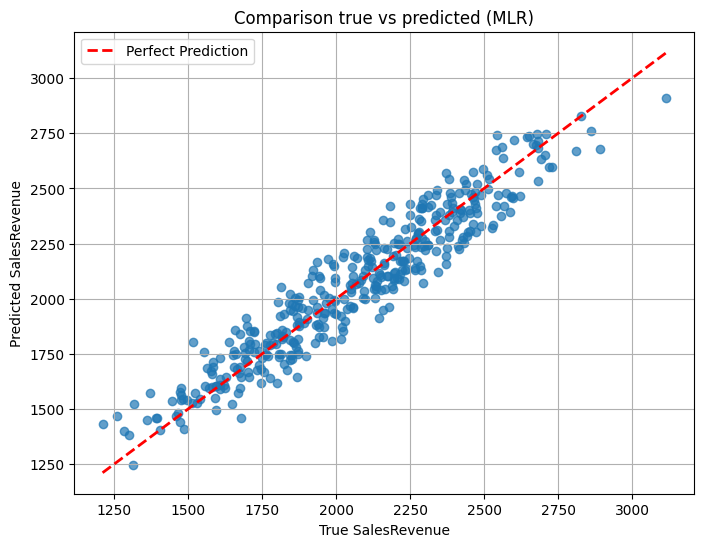

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt

lr = LinearRegression()
lr.fit(X_train, y_train)

y_train_pred_lr = lr.predict(X_train)
y_test_pred_lr = lr.predict(X_test)

mae_train_lr = mean_absolute_error(y_train, y_train_pred_lr)
mse_train_lr = mean_squared_error(y_train, y_train_pred_lr)
mape_train_lr = mean_absolute_percentage_error(y_train, y_train_pred_lr)
r2_train_lr = r2_score(y_train, y_train_pred_lr)

mae_test_lr = mean_absolute_error(y_test, y_test_pred_lr)
mse_test_lr = mean_squared_error(y_test, y_test_pred_lr)
mape_test_lr = mean_absolute_percentage_error(y_test, y_test_pred_lr)
r2_test_lr = r2_score(y_test, y_test_pred_lr)

print("\n=== MLR Train===")
print(f"MAE Train: {mae_train_lr:.4f}")
print(f"MSE Train: {mse_train_lr:.4f}")
print(f"MAPE Train: {mape_train_lr:.4f}")
print(f"R² Train: {r2_train_lr:.4f}")
print("\n---")
print(f"MAE Test: {mae_test_lr:.4f}")
print(f"MSE Test: {mse_test_lr:.4f}")
print(f"MAPE Test: {mape_test_lr:.4f}")
print(f"R² Test: {r2_test_lr:.4f}")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred_lr, alpha=0.7)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', lw=2, label='Perfect Prediction')
plt.xlabel("True SalesRevenue")
plt.ylabel("Predicted SalesRevenue")
plt.title("Comparison true vs predicted (MLR)")
plt.legend()
plt.grid(True)
plt.show()